In [1]:
#Kesifci veri analizi : Betimsel istatistikler,veri görselleştirme teknikleri ve
#iş çıktısı hedefiyle veri üzerinde çalışmaktır.
#Veri bilimcinin özgürce çalışabileceği,söz konusu olmayan yeni bulgulara ulaşabileceği,
#yeni iş fikirleri,yeni işe yara sonuçlara ulaşabileceği,sorular sorarak,hipotezler kurarak
#ilerlediği süreçtir.

Veriye İlk Bakış

In [2]:
import seaborn as sns

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
#Veri setini yedekleme
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
import pandas as pd
df.method = pd.Categorical(df.method)
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [6]:
#bütün değişkenlerdeki unique değerleri görmek için
df.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

In [7]:
#eksik gözlem değerlerinin varlığını sorgulamak

df.isnull().values.any()

True

In [8]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [9]:
#eksik gözlem değerlerini 0 yapmak için
df['orbital_period'].fillna(0,inplace=True)

In [10]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [11]:
import numpy as np

df['mass'].fillna(np.mean(df.mass),inplace=True)
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

Kategorik Değişken Özetleri

In [12]:
kat_df = df.select_dtypes(include=['category'])
kat_df

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
5,Radial Velocity
6,Radial Velocity
7,Radial Velocity
8,Radial Velocity
9,Radial Velocity


In [13]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [14]:
kat_df.method.unique()

[Radial Velocity, Imaging, Eclipse Timing Variations, Transit, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]
Categories (10, object): [Radial Velocity, Imaging, Eclipse Timing Variations, Transit, ..., Orbital Brightness Modulation, Microlensing, Pulsar Timing, Pulsation Timing Variations]

In [15]:
kat_df['method'].value_counts().count()

10

In [16]:
#Kategorik değerlerin sınıf frekanslarına erişmek
kat_df['method'].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

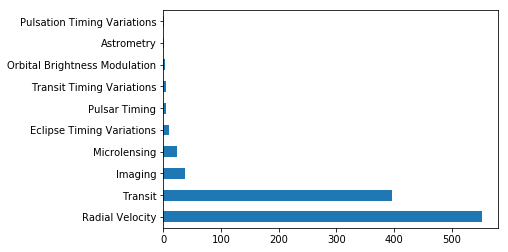

In [17]:
df['method'].value_counts().plot.barh()

In [18]:
#kategorik değişkenlerin ölçek türünü değiştirmek
from pandas.api.types import CategoricalDtype

kat_df = kat_df.astype(CategoricalDtype(ordered = True))

In [19]:
kat_df.method.head()

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
4    Radial Velocity
Name: method, dtype: category
Categories (10, object): [Astrometry < Eclipse Timing Variations < Imaging < Microlensing ... Pulsation Timing Variations < Radial Velocity < Transit < Transit Timing Variations]

Sürekli Değişken Özetleri

In [20]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [21]:
df_num = df.select_dtypes(include=['float64','int64'])
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [22]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.0000,1.000000,1.000000,2.000000,7.0
orbital_period,1035.0,1919.704595,25471.198309,0.0000,4.461268,31.884000,487.100000,730000.0
mass,1035.0,2.638161,2.687081,0.0036,1.285000,2.638161,2.638161,25.0
distance,808.0,264.069282,733.116493,1.3500,32.560000,55.250000,178.500000,8500.0
year,1035.0,2009.070531,3.972567,1989.0000,2007.000000,2010.000000,2012.000000,2014.0


In [23]:
df_num['mass'].describe()

count    1035.000000
mean        2.638161
std         2.687081
min         0.003600
25%         1.285000
50%         2.638161
75%         2.638161
max        25.000000
Name: mass, dtype: float64

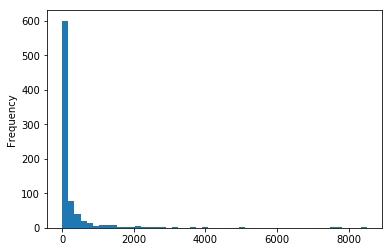

In [24]:
df['distance'].plot.hist(bins=50)

Dağılım-Barplot

In [25]:
diamonds = sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
df.shape

(53940, 10)

In [27]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [29]:
from pandas.api.types import CategoricalDtype

df.cut = df.cut.astype(CategoricalDtype(ordered = True))
df.color = df.color.astype(CategoricalDtype(ordered = True))
df.clarity = df.clarity.astype(CategoricalDtype(ordered = True))

In [30]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

In [31]:
cut_kategoriler=['Fair','Good','Very Good','Premium','Ideal']
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler,ordered=True))

Barplot

Text(0.5, 1.0, 'Barplot Kategorik Değişken Görselleştirmek İçin Kullanılır')

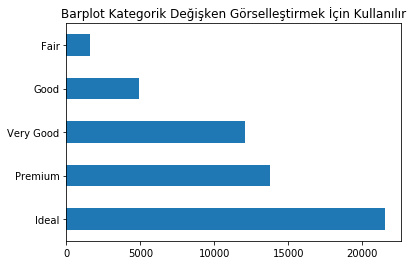

In [32]:
df['cut'].value_counts().plot.barh().set_title('Barplot Kategorik Değişken Görselleştirmek İçin Kullanılır')


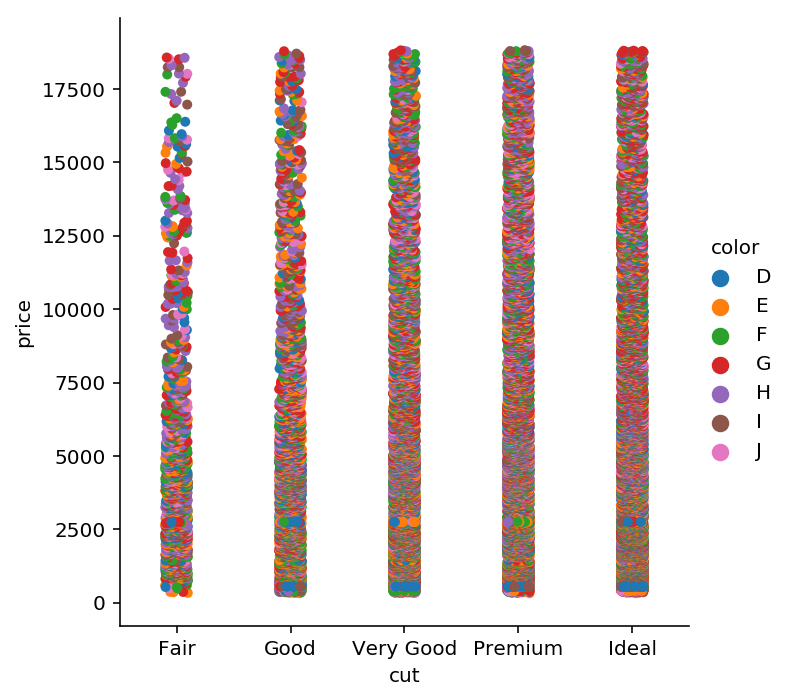

In [33]:
%config InlineBackend.figure_format = 'retina'

sns.catplot(x='cut',y='price',hue = 'color',data=df);

Dağılım-Histogram ve Yoğunluk

In [34]:
#Sürekli değişkenleri görselleştirmek için kullanılır.

In [36]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


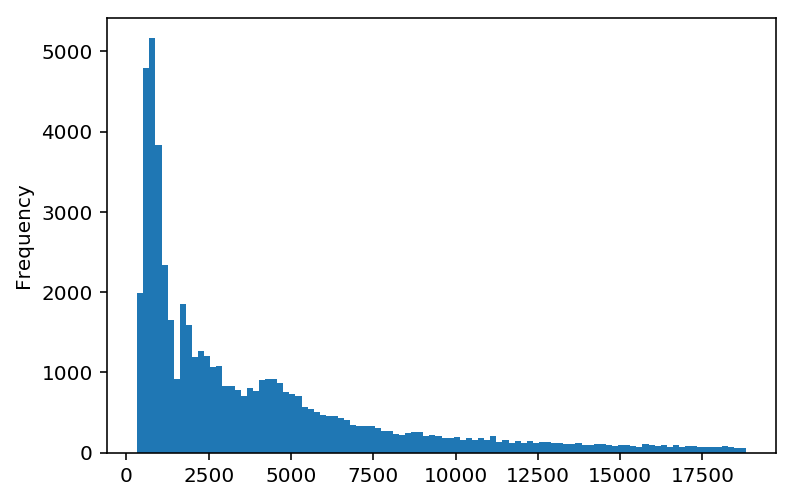

In [37]:
(df['price']
.plot
.hist(bins=100));

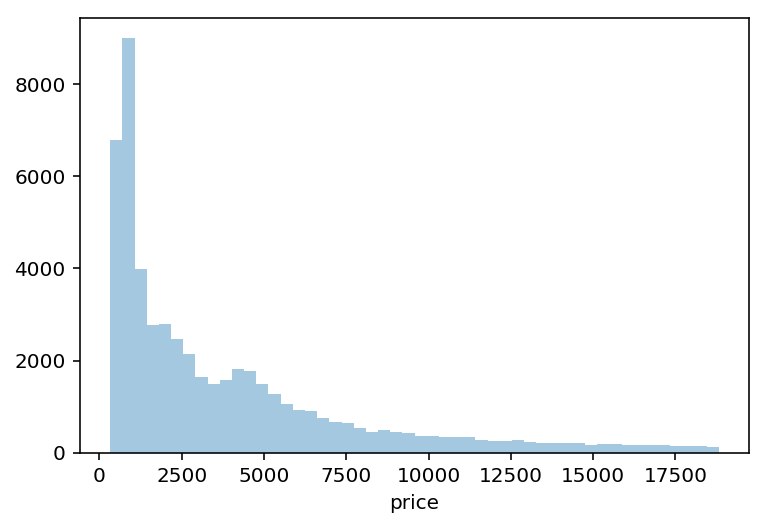

In [38]:
sns.distplot(df.price,kde=False);

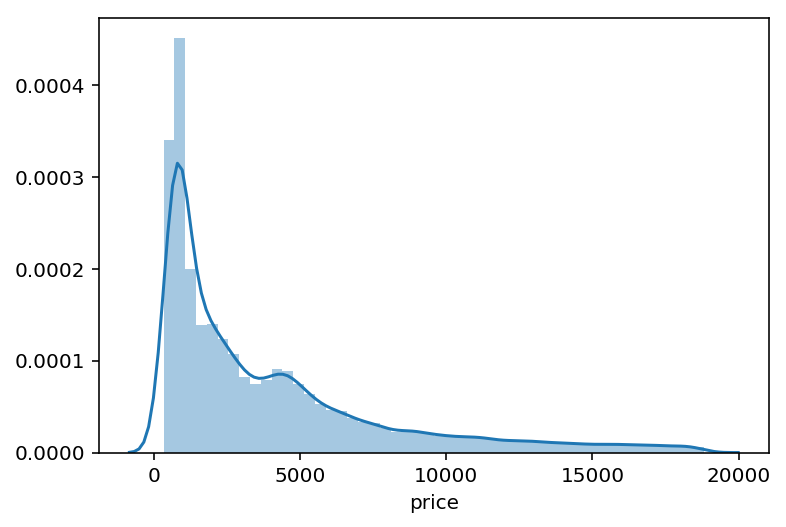

In [39]:
sns.distplot(df.price);

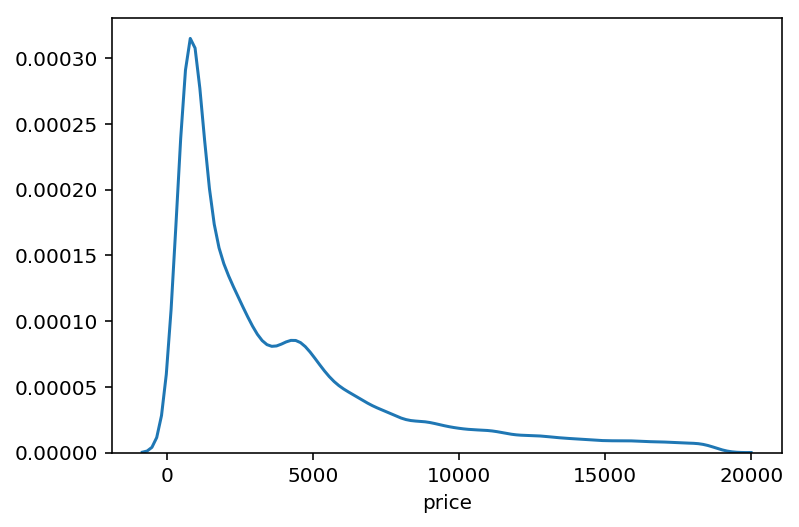

In [40]:
#Sadece yoğunluk grafiği için
sns.distplot(df.price,hist=False);

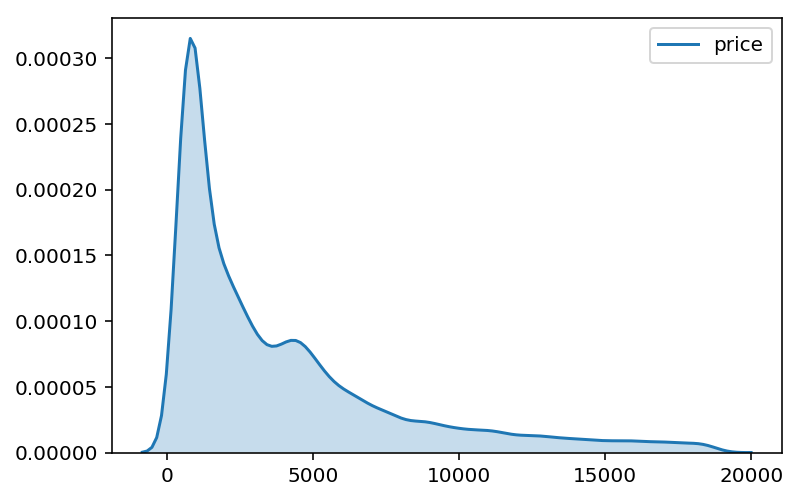

In [42]:
sns.kdeplot(df.price,shade=True);

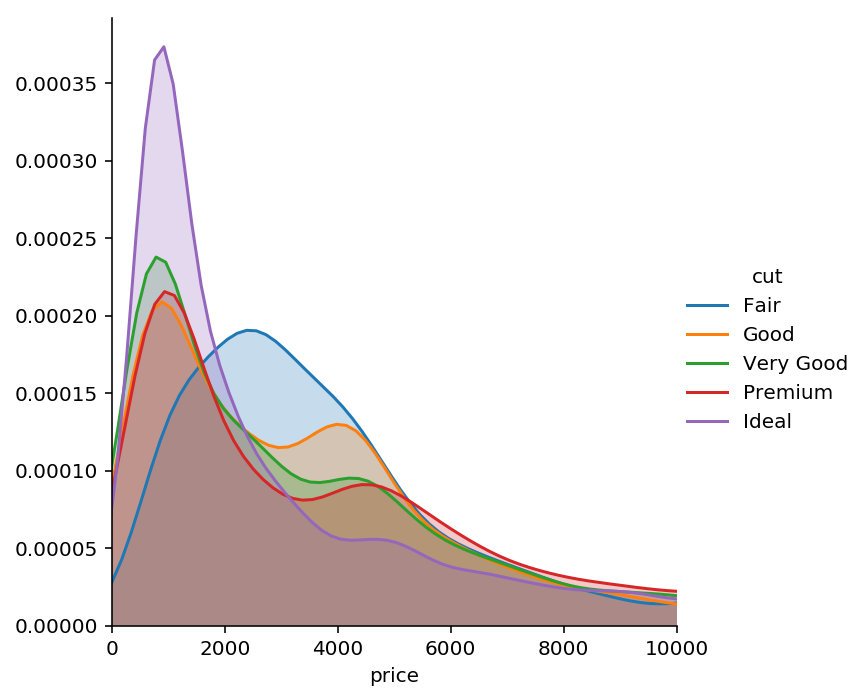

In [43]:
(sns
    .FacetGrid(df,
               hue='cut',
               height=5,
               xlim=(0,10000))
    .map(sns.kdeplot,'price',shade=True)
    .add_legend()
    );

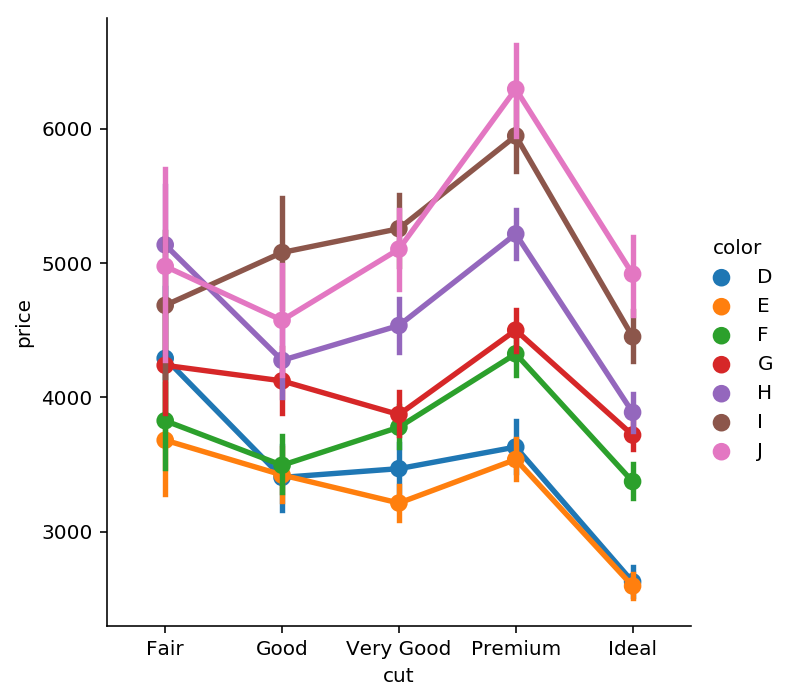

In [44]:
#Fiyatın farklı seviyelerinde 2 kategorik geğişkenin etkilerini görebilmek için.
sns.catplot(x='cut',y='price',hue='color',kind='point',data=df);

Dağılım-Boxplot

In [ ]:
# total_bill : yemeğin toplam fiyatı(bahşiş ve vergi dahil)

#tip:bahşiş

#sex:ücreti ödeyen kişinin cinsiyeti(0=male,1=female)

#smoker:grupta sigara içen var mı ?(0=No,1=Yes)

#day:gün(3=Thur,4=Fri,5=Sat,6=Sun)

#time:ne zaman(0=Day,1=Night)

#size:grupta kaç kişi var?

In [45]:
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


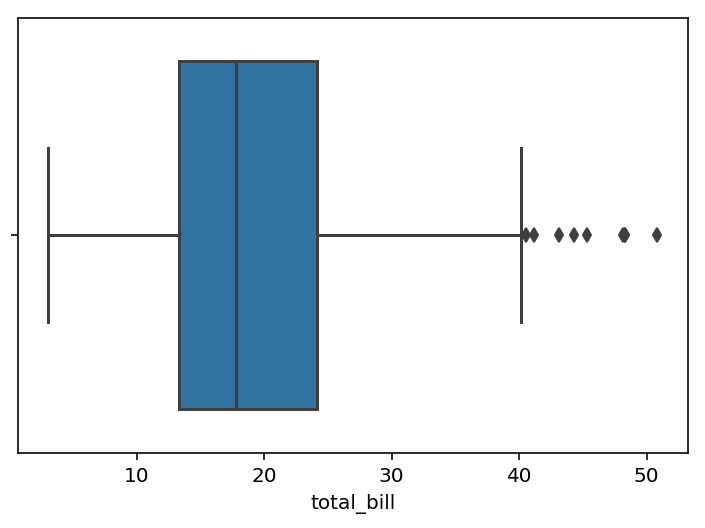

In [48]:
sns.boxplot(x=df['total_bill']);

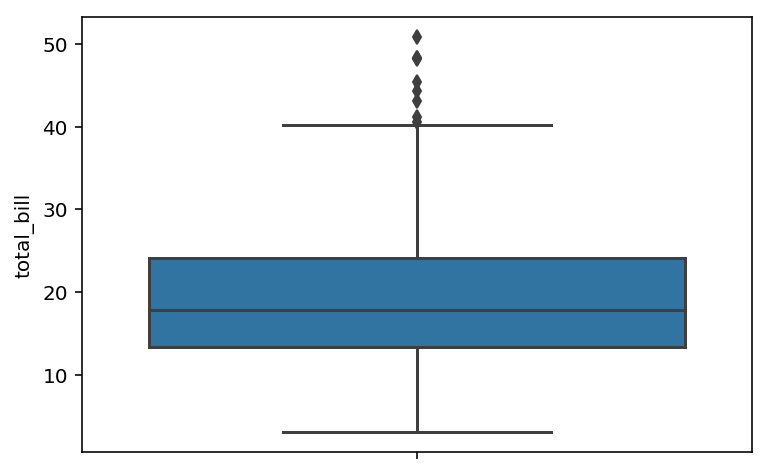

In [49]:
#aynı grafiğin vertical hali
#grafikte 40'tan sonra görülen noktalar aykırı değerleri gösteriyor(extreme values)

sns.boxplot(x=df['total_bill'],orient='v');

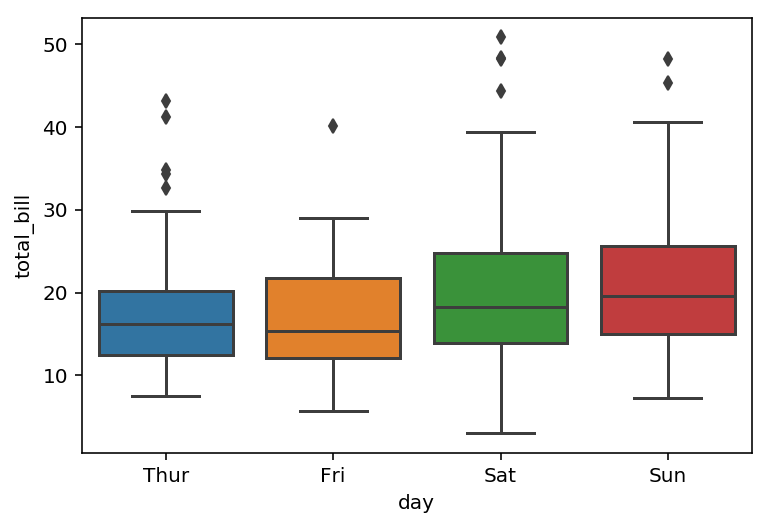

In [50]:
#Restoran hangi günler daha çok kazanıyor(gelir ile dün değerlerini aynı anda sorguluyoruz)
#Haftasonları gelir artıyor
sns.boxplot(x="day",y="total_bill",data=df);

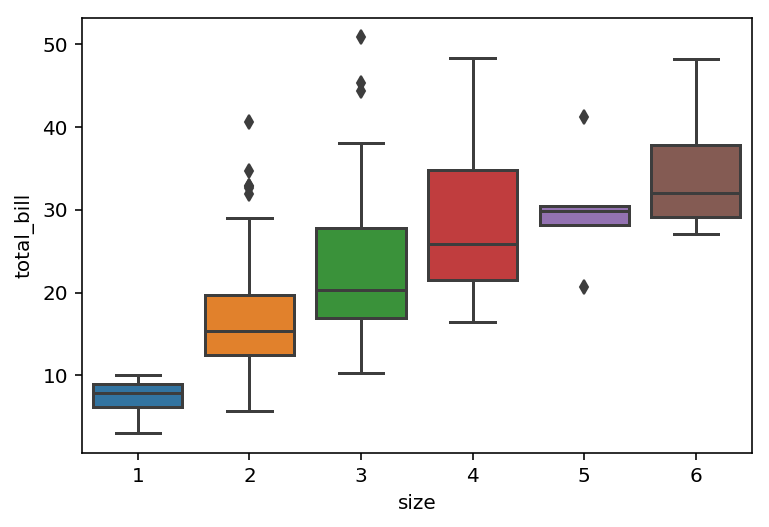

In [51]:
#Restorana gelen gruplardaki kişi sayısıyla gelir arasındaki ilişki doğru orantılı mı?
#Kişi sayısı arttıkça gelir artıyor
sns.boxplot(x='size',y='total_bill',data=df);

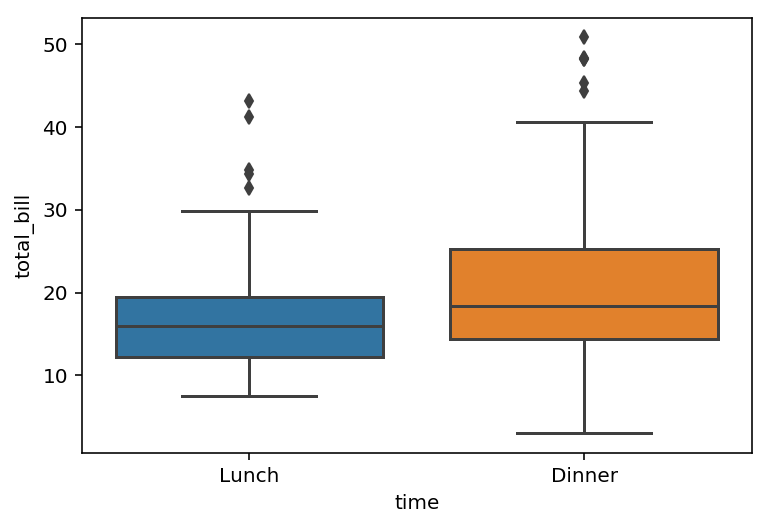

In [52]:
#Gündüz mü yoksa akşam mı daha çok kazanıyoruz.
#Çok fark yok gibi ama akşam daha çok kazanılıyor.
sns.boxplot(x='time',y='total_bill',data=df);

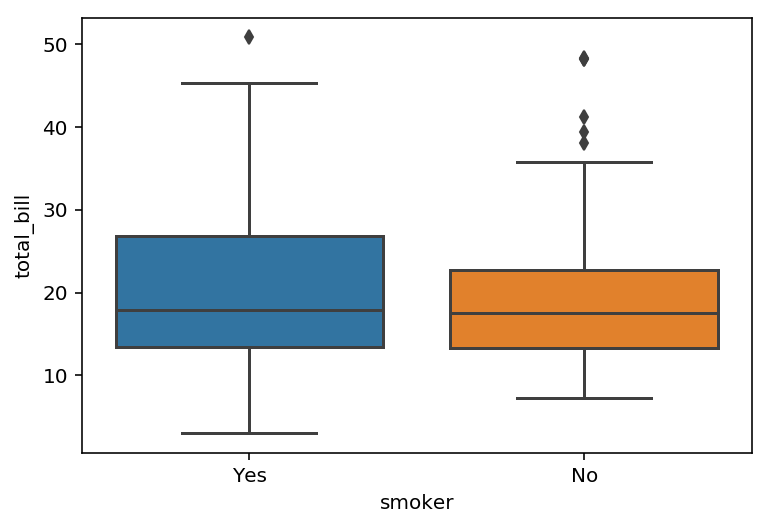

In [53]:
#Sigara içenlerin kazanca etkisi ?
#Sigara içenler daha çok para ödüyorlar
sns.boxplot(x='smoker',y='total_bill',data=df);

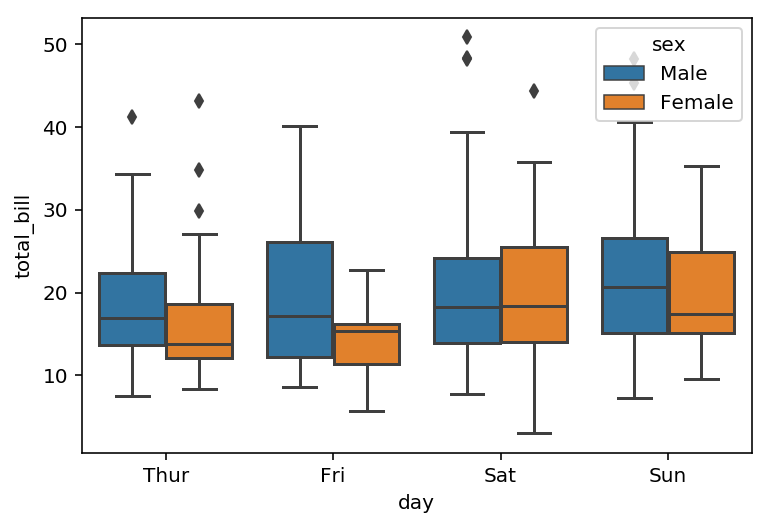

In [54]:
#Gün ve cinsiyete göre ödenen hesaplar ?

sns.boxplot(x="day",y="total_bill",hue="sex",data=df);

Dağılım-Violin

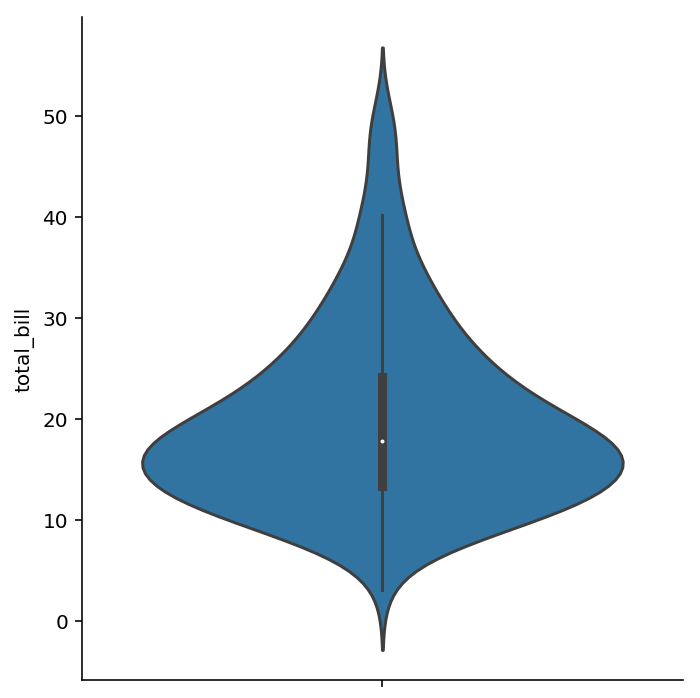

In [55]:
sns.catplot(y="total_bill",kind="violin",data=df);
#Violin grafikler basıklıkla ilgili bilgiler verir
#Boxplot'la benzer işe yarar fakat boxplot'ta çeyreklikler arasındaki geçişler keskindir violin
#grafiklerde bu geçişlerin nasıl gerçekleştiğini görebiliyoruz.

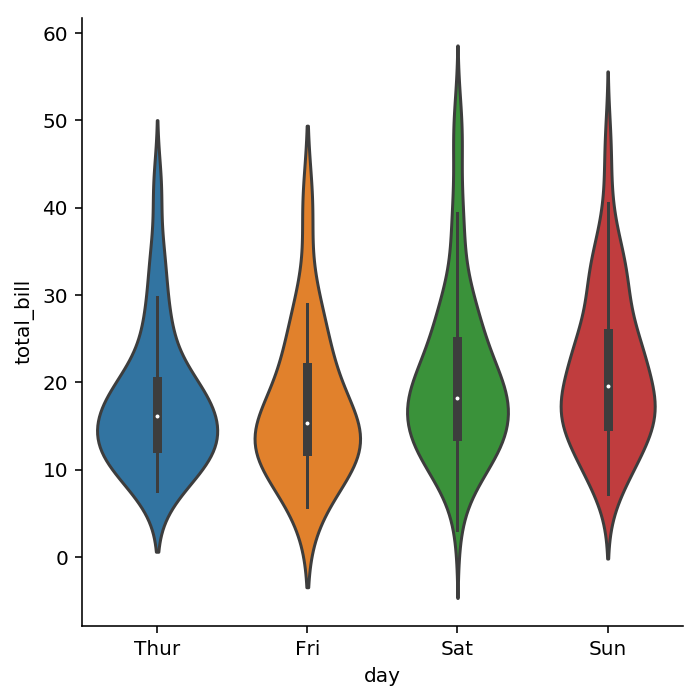

In [56]:
sns.catplot(x='day',y='total_bill',kind='violin',data=df);

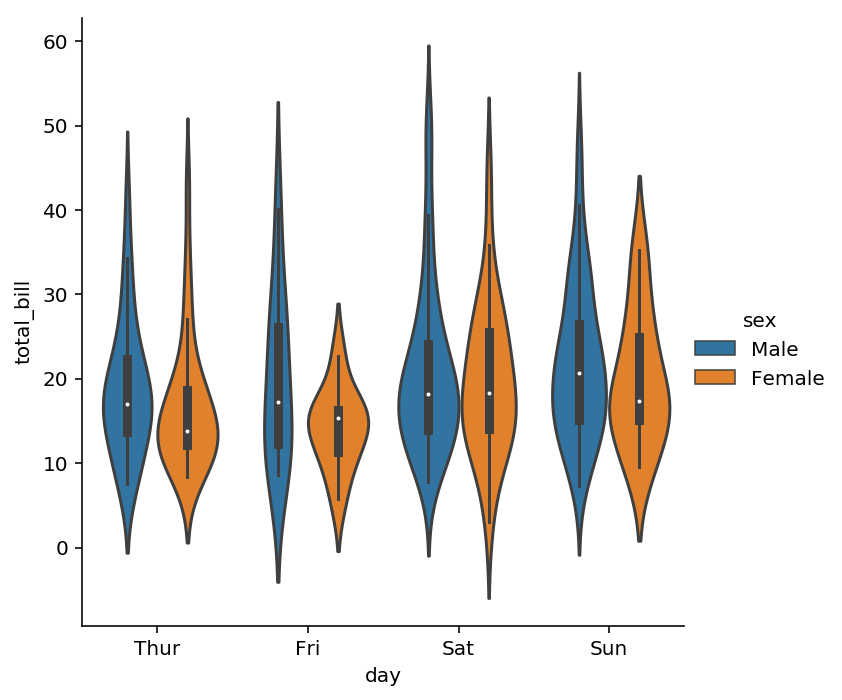

In [57]:
sns.catplot(x='day',y='total_bill',kind='violin',hue='sex',data=df);

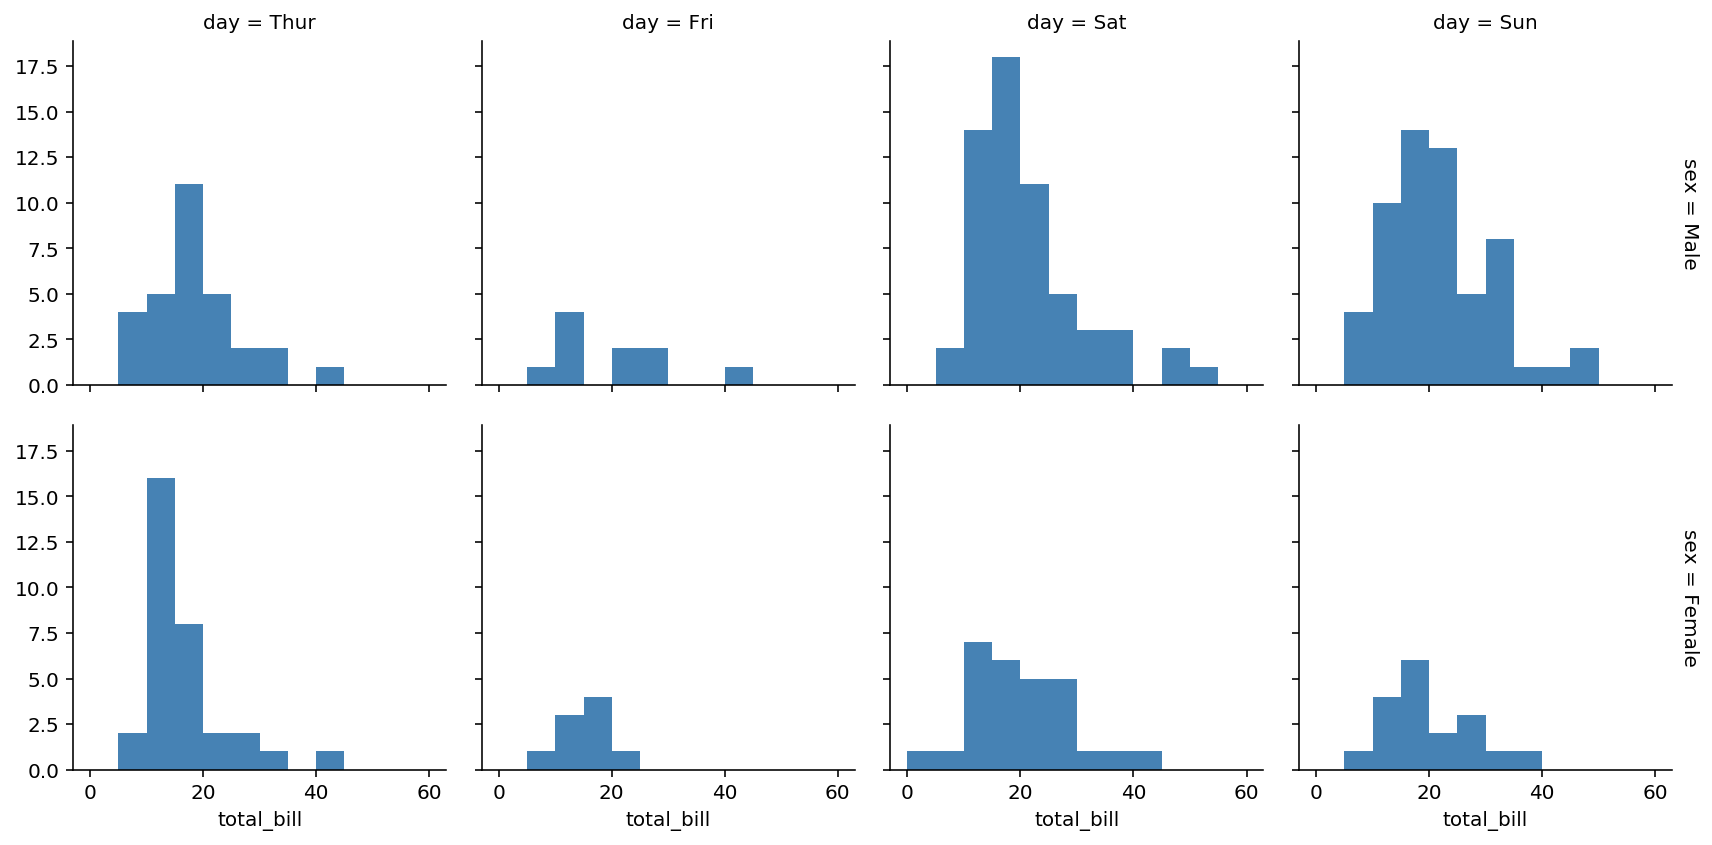

In [58]:
import numpy as np
import matplotlib.pyplot as plt

g = sns.FacetGrid(df,row="sex",col="day",margin_titles=True)
bins = np.linspace(0,60,13) #aralıklar
g.map(plt.hist,"total_bill",color="steelblue",bins=bins);

Korelasyon-Basit Scatterplot

In [59]:
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


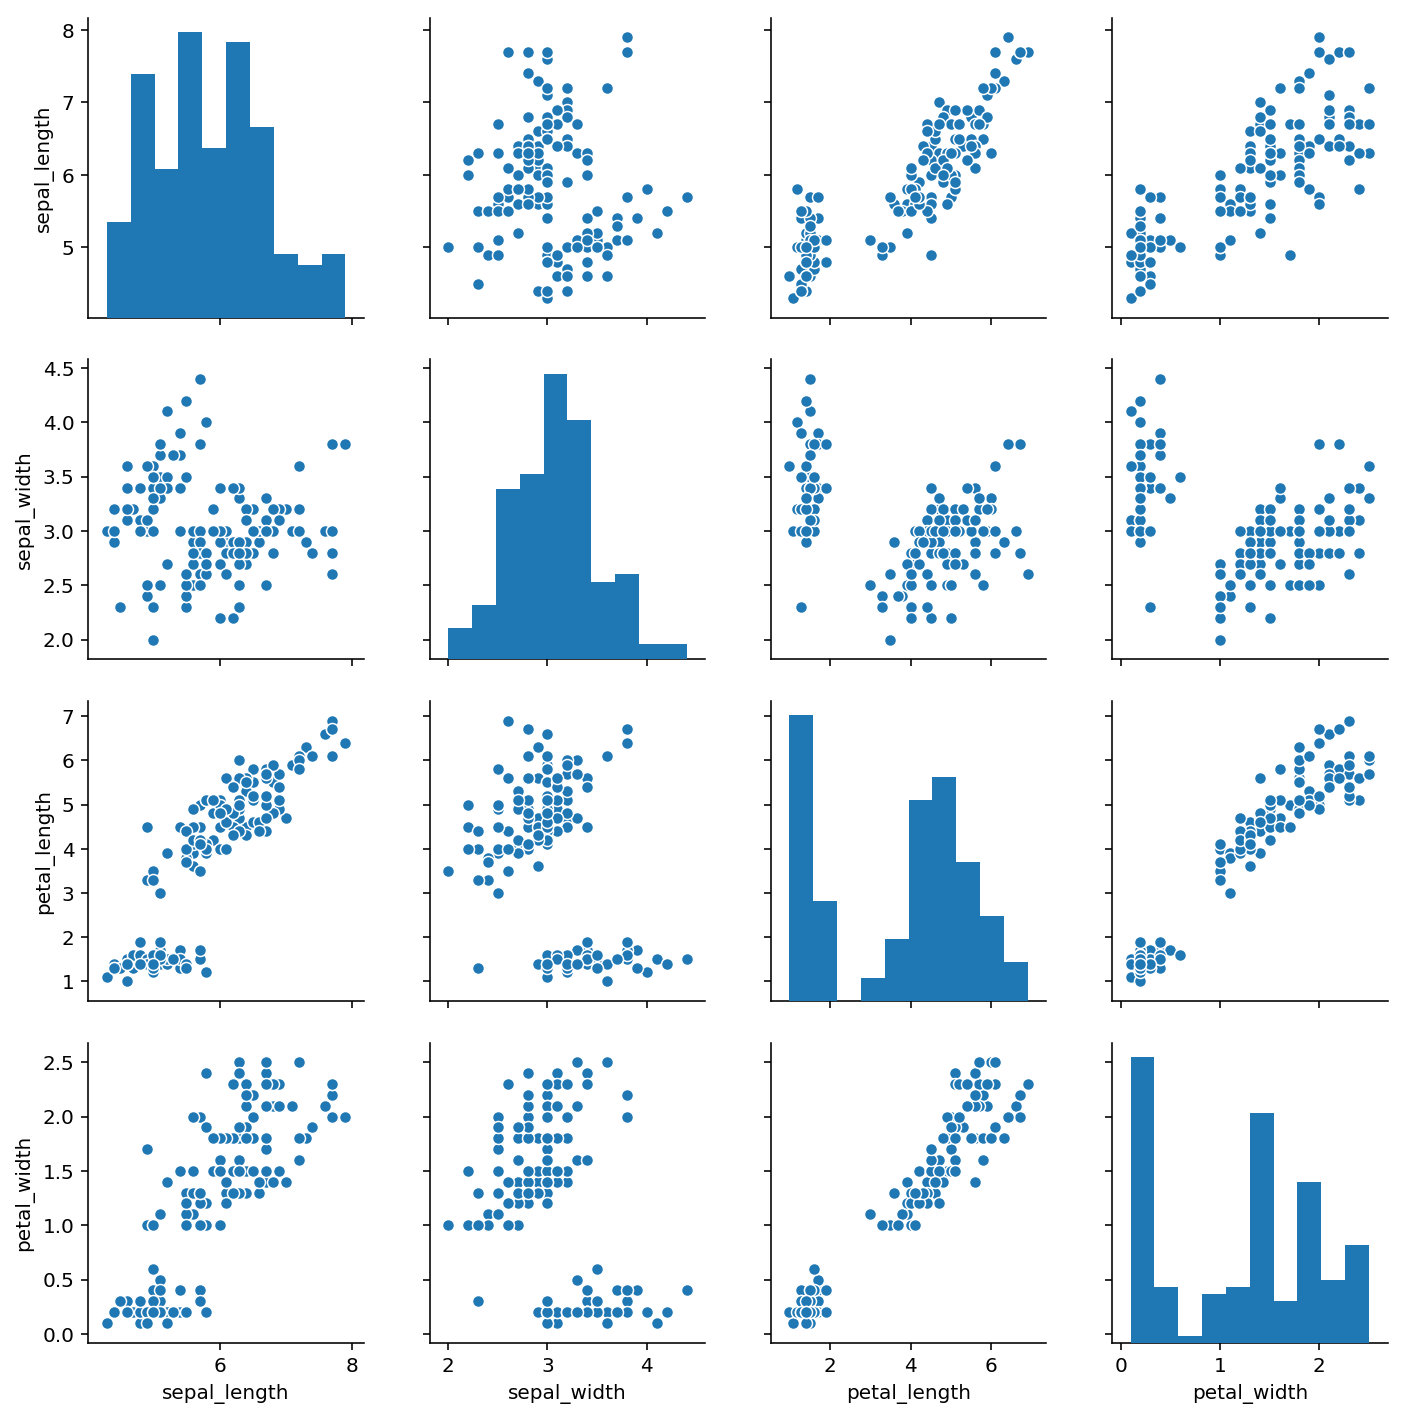

In [60]:
#Korelasyon:Değişkenler arasındaki ilişkiyi ifade eden istatistiksel teknik.
sns.pairplot(df)

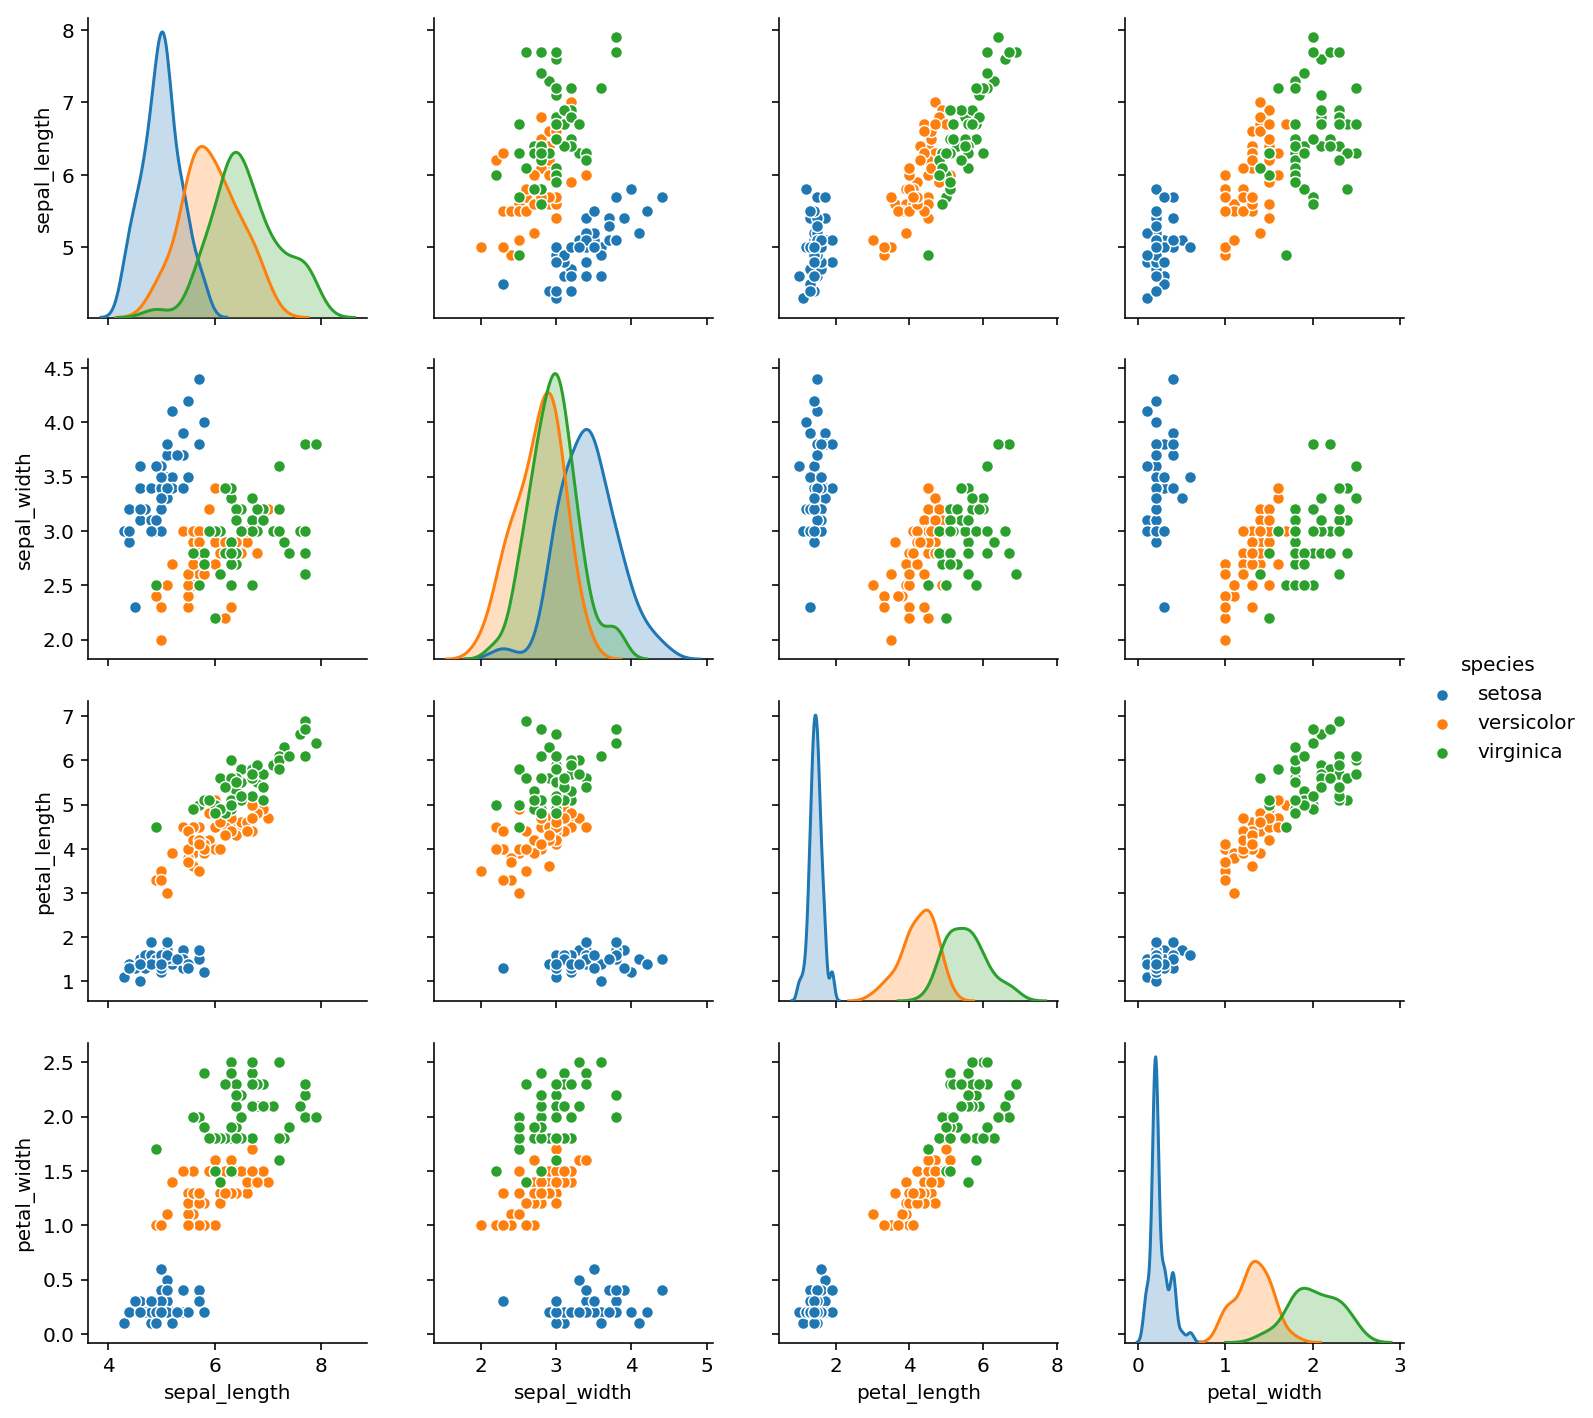

In [61]:
#türler(species) bağımlı değişken geri kalan değişkenler bağımsızdır.
sns.pairplot(df,hue="species")

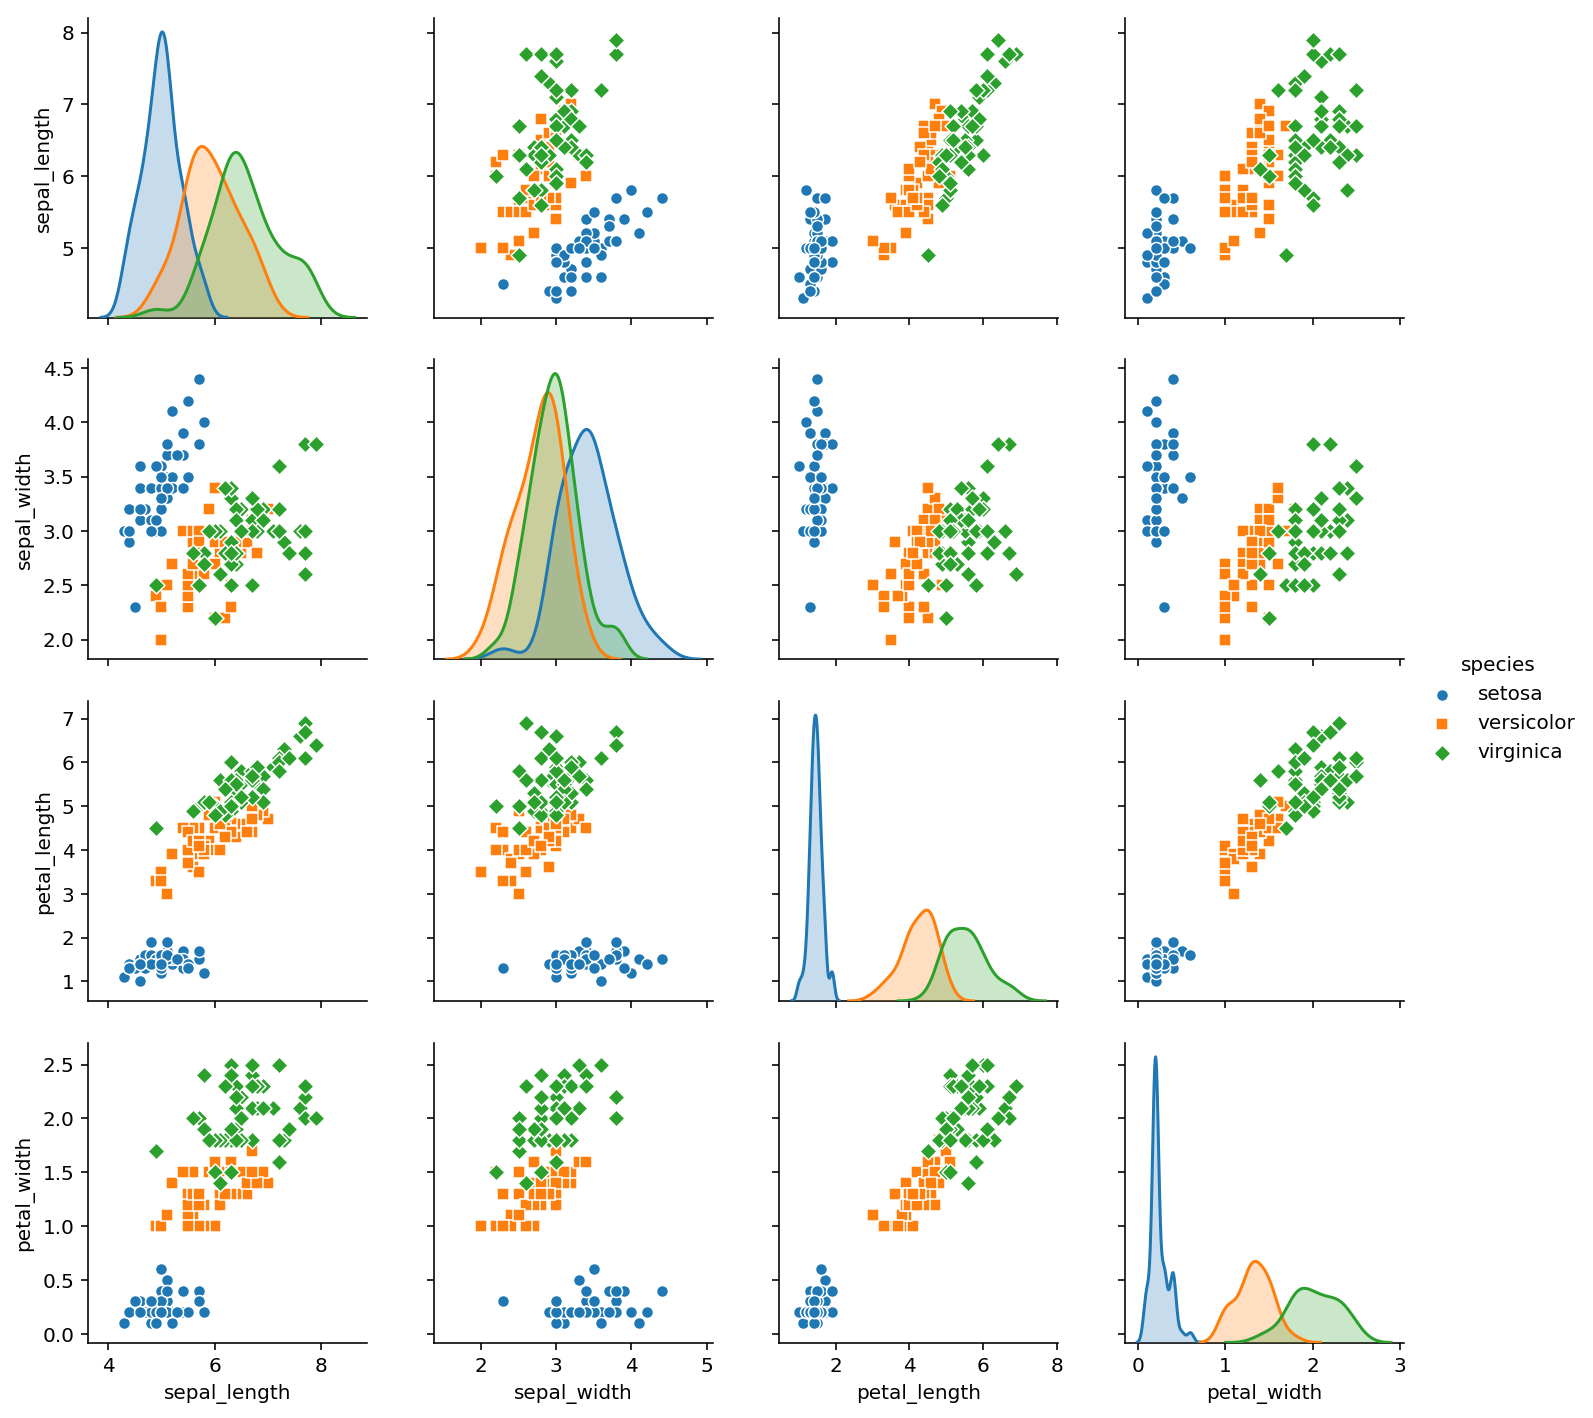

In [62]:
sns.pairplot(df,hue="species",markers=['o','s','D']);

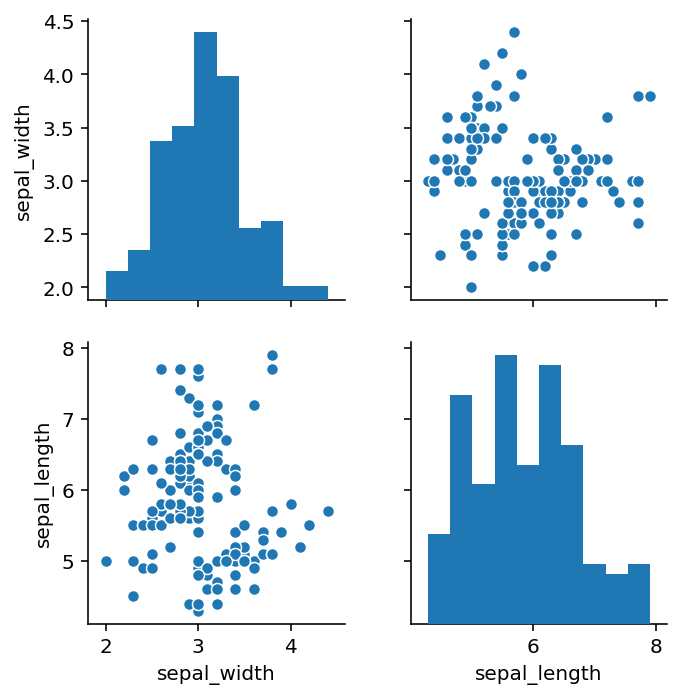

In [63]:
#Alt küme seçme
sns.pairplot(df,vars=['sepal_width','sepal_length']);

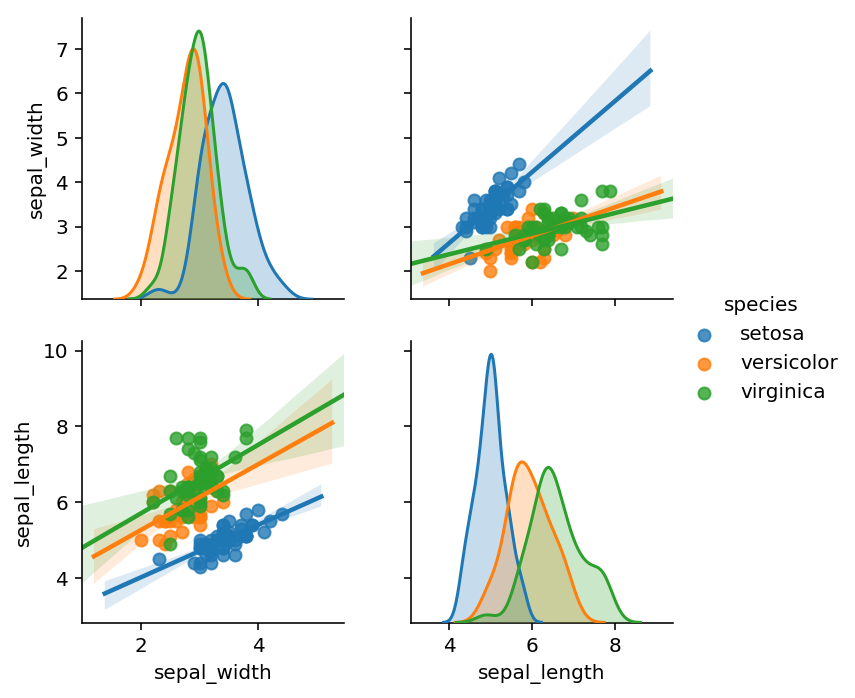

In [65]:
sns.pairplot(df,vars=['sepal_width','sepal_length'],hue='species',kind="reg");

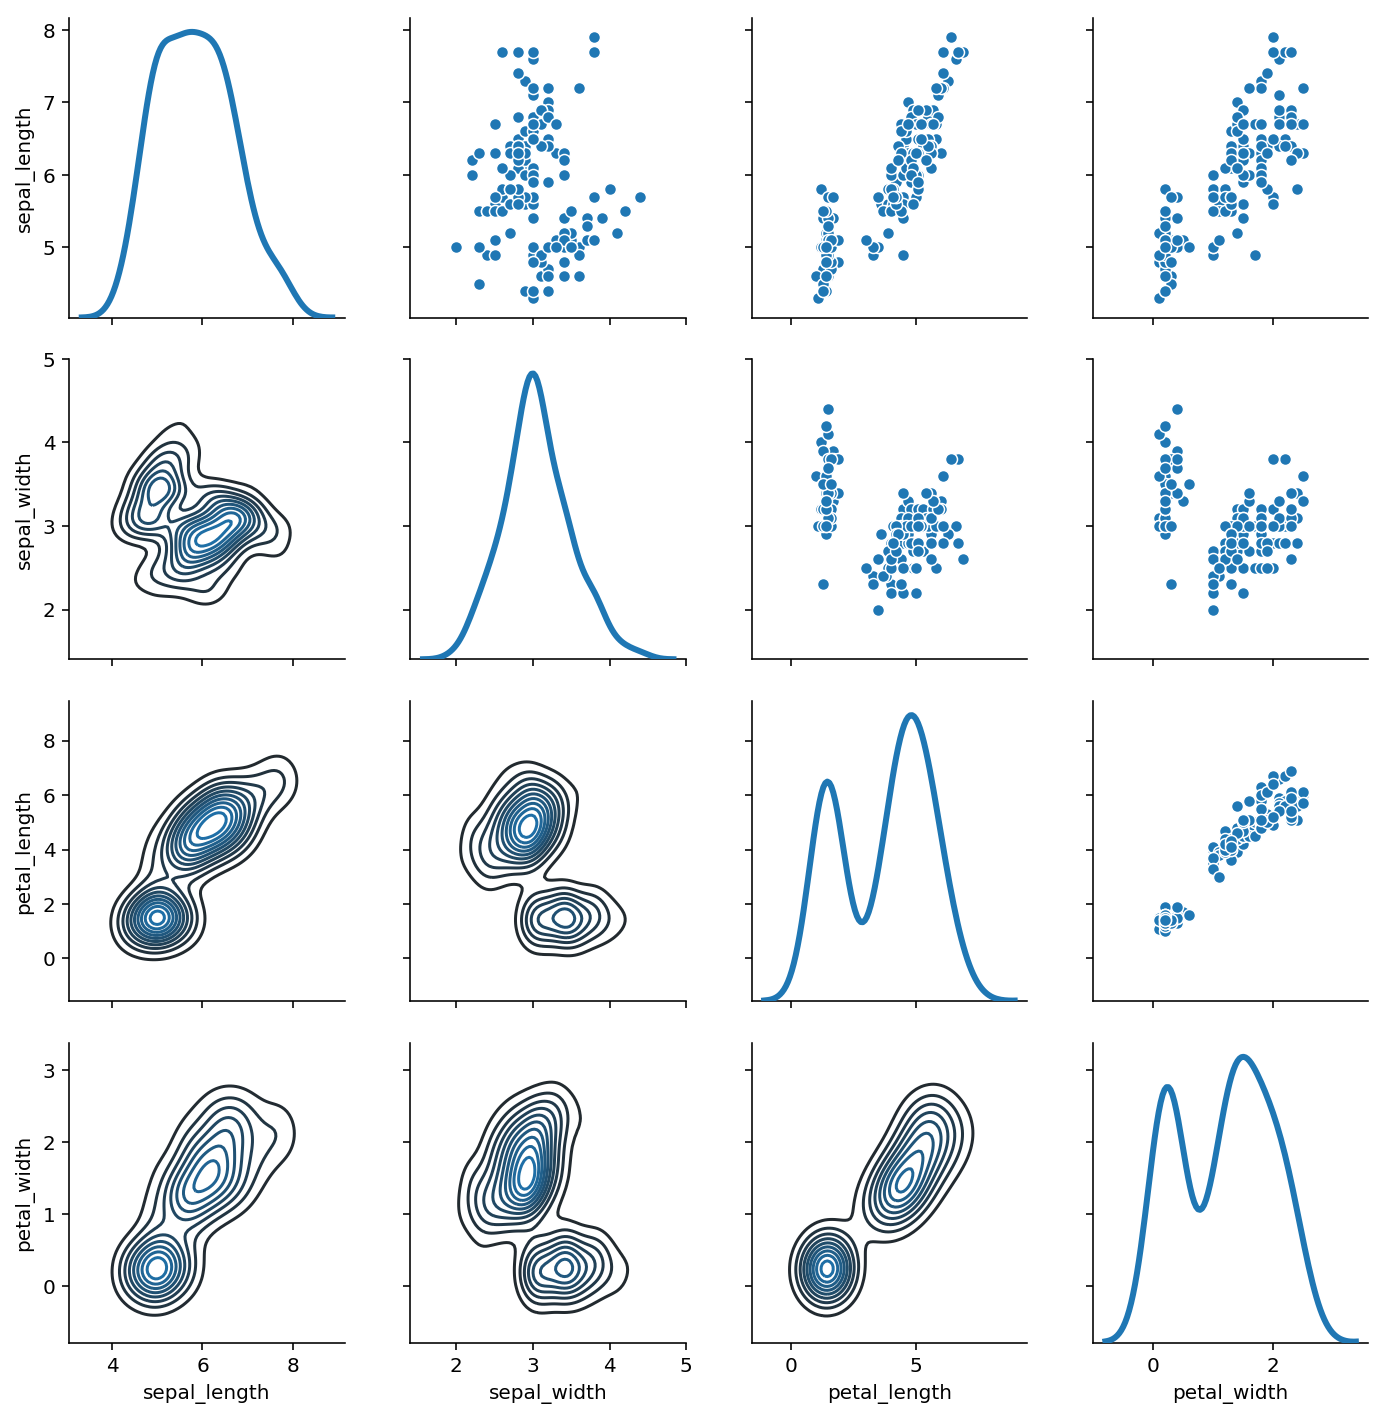

In [66]:
g = sns.PairGrid(df,diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot,lw=3)

Korelasyon-Heatmap

In [67]:
flights = sns.load_dataset('flights')
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [68]:
df.shape

(144, 3)

In [70]:
df = df.pivot("month","year","passengers")
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


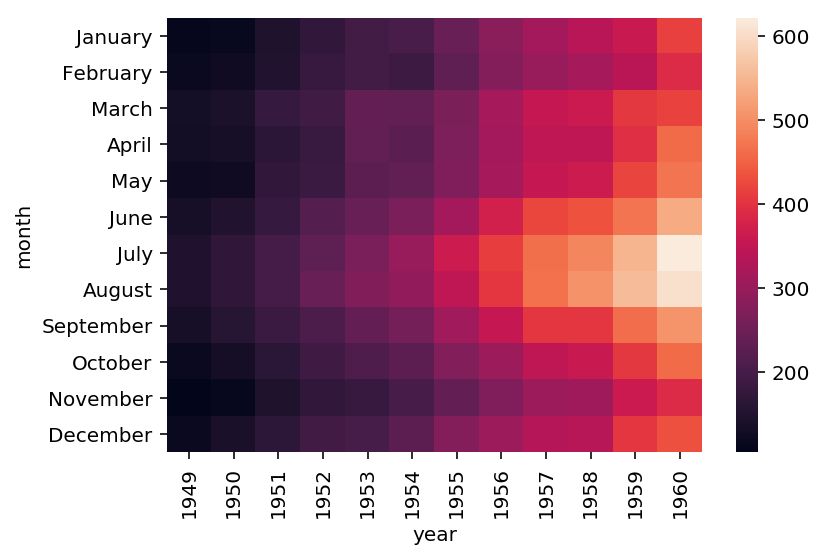

In [71]:
sns.heatmap(df);

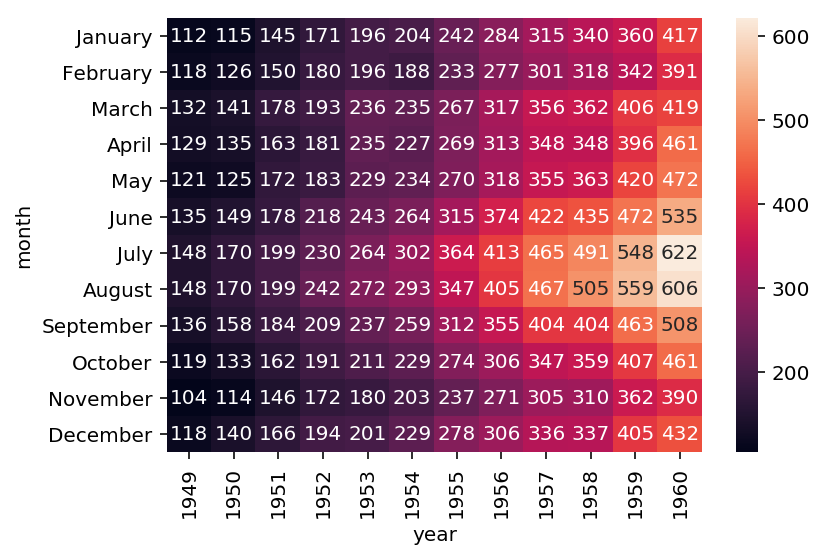

In [72]:
sns.heatmap(df,annot=True,fmt='d')

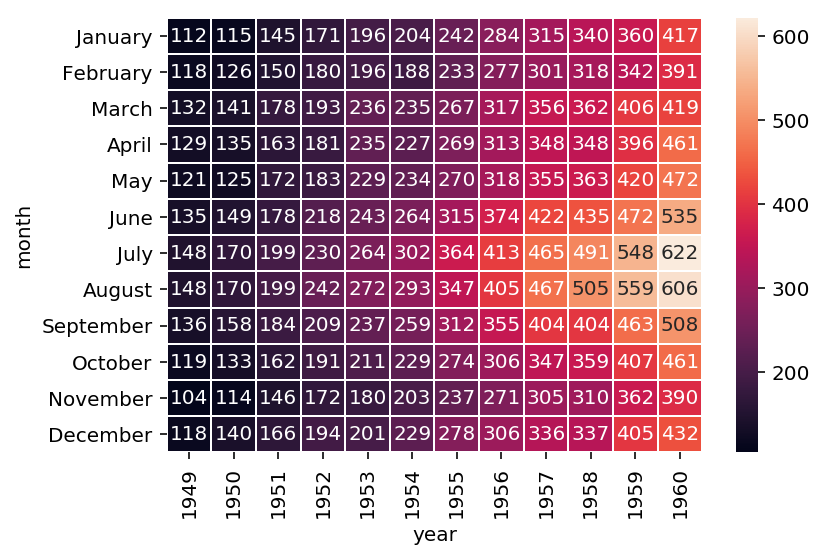

In [73]:
sns.heatmap(df,annot=True,fmt='d',linewidths=.5)

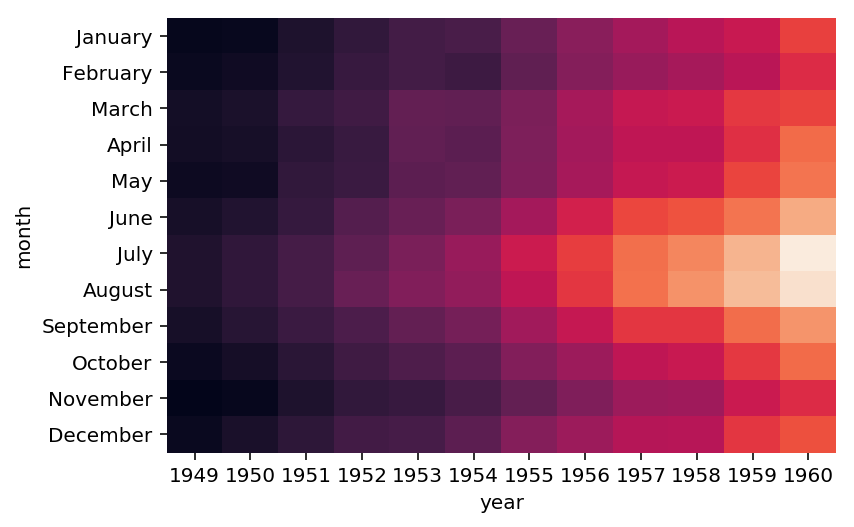

In [74]:
sns.heatmap(df,cbar=False)

In [75]:
#Çıktı boyutu
sns.set_context("poster")
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style("whitegrid")